2.05530600104298


<function matplotlib.pyplot.show(close=None, block=None)>

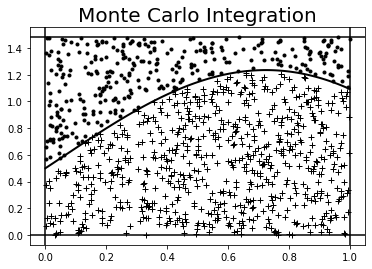

In [12]:
# Integration by Monte Carlo

import random as r
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return 0.5*np.exp(-x) + np.sin(2*x)

a, b, n = 0, 1, 100
x = np.linspace(a, b, n)
y = [f(i) for i in x]

xmin = x[0]
xmax = x[n-1]
ymin = 0
ymax = np.max(y)
ymax = ymax*1.2               # increament by 20%, max height

# Area of the box of trail

xside = xmax - xmin
yside = ymax - ymin
rect_area = xside*yside

# Monte Carlo steps
upy, upx, downx, downy = [], [], [], []
trail = 1000
count = 0
for i in range(trail):
    xs = xmin + xside*r.random()
    ys = ymin + yside*r.random()
    
    if ys <= f(xs):
        count += 1

for i in range(trail):
    xr = xmin + xside*r.random()
    yr = ymin + yside*r.random()
    
    if yr <= f(xr):
        count += 1
        downx.append(xr)
        downy.append(yr)
    else:
        upx.append(xr)
        upy.append(yr)
        
frac_area = rect_area*float(count)/trail
print(frac_area)

# For plotting

plt.plot(x, y, '-', color = 'black', lw = 2)
plt.plot(upx, upy, '.', color = 'black')
plt.plot(downx, downy, '+', color = 'black')

plt.axhline(y = ymax, color = 'black')
plt.axhline(y = ymin, color = 'black')
plt.axvline(x = xmin, color = 'black')
plt.axvline(x = xmax, color = 'black')

plt.title('Monte Carlo Integration', size = '20')
plt.show